# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [36]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving cost_revenue_dirty.csv to cost_revenue_dirty (1).csv


In [5]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [8]:
print(f" The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

 The dataset contains 5391 rows and 6 columns.


In [24]:
data.isna().values.any()

False

In [25]:
data.duplicated().values.any()

False

In [19]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [27]:
to_replace = ["$", ","]
columns_to_update = ["USD_Production_Budget",
                     "USD_Worldwide_Gross",
                     "USD_Domestic_Gross"]

for col in columns_to_update:
  for char in to_replace:
    data[col] = data[col].astype(str).str.replace(char, "")
  data[col] = pd.to_numeric(data[col])


<ipython-input-27-783ef8f40020>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char, "")


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [31]:
data.Release_Date = pd.to_datetime(data.Release_Date)

In [32]:
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [51]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [52]:
data[data.USD_Production_Budget == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [53]:
data[data.USD_Production_Budget == 425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [61]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f"{len(zero_domestic)} films grossed $0 domestically.")
zero_domestic.sort_values("USD_Production_Budget", ascending=False).head(10)

512 films grossed $0 domestically.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [63]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f"{len(zero_worldwide)} films grossed $0 worldwide")
zero_worldwide.sort_values("USD_Production_Budget", ascending=False).head(10)

357 films grossed $0 worldwide


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5092,1435,2015-12-31,The Crow,40000000,0,0
3300,1631,2008-12-31,Black Water Transit,35000000,0,0
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0


### Filtering on Multiple Conditions

In [65]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]
print(f"There were {len(international_releases)} international releases.")
international_releases.head()

There were 155 international releases.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [71]:
international_releases = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0")
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [72]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [81]:
unreleased = data[data.Release_Date >= scrape_date]
print(f"There are {len(unreleased)} films that have not yet been released.")
unreleased

There are 7 films that have not yet been released.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [82]:
data_clean = data.drop(unreleased.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [101]:
loss_films = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
print(f"{round(len(loss_films)/len(data_clean)*100,1)}% of films made a loss.")

37.3% of films made a loss.


# Seaborn for Data Viz: Bubble Charts

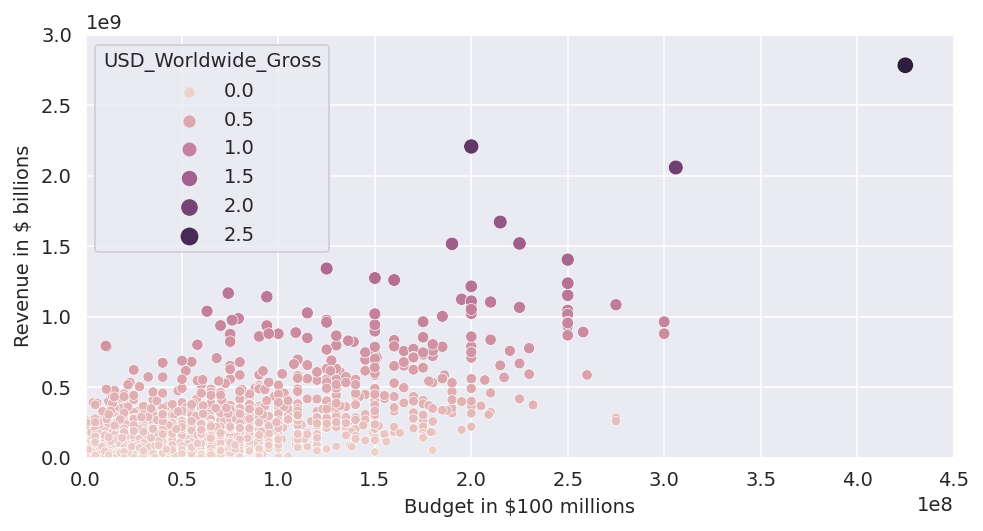

In [114]:
plt.figure(figsize=(8,4), dpi=140)


# set styling on a single chart
with sns.axes_style("darkgrid"):
  ax = sns.scatterplot(data=data_clean,
                  x="USD_Production_Budget",
                  y="USD_Worldwide_Gross",
                  hue='USD_Worldwide_Gross', # colour
                  size='USD_Worldwide_Gross') # dot size


ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       xlabel="Budget in $100 millions",
       ylabel="Revenue in $ billions")
       

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



[(0.0, 450000000.0),
 Text(0, 0.5, 'Film Budget in $100 millions'),
 (699287.0, 736694.0),
 Text(0.5, 0, 'Year')]

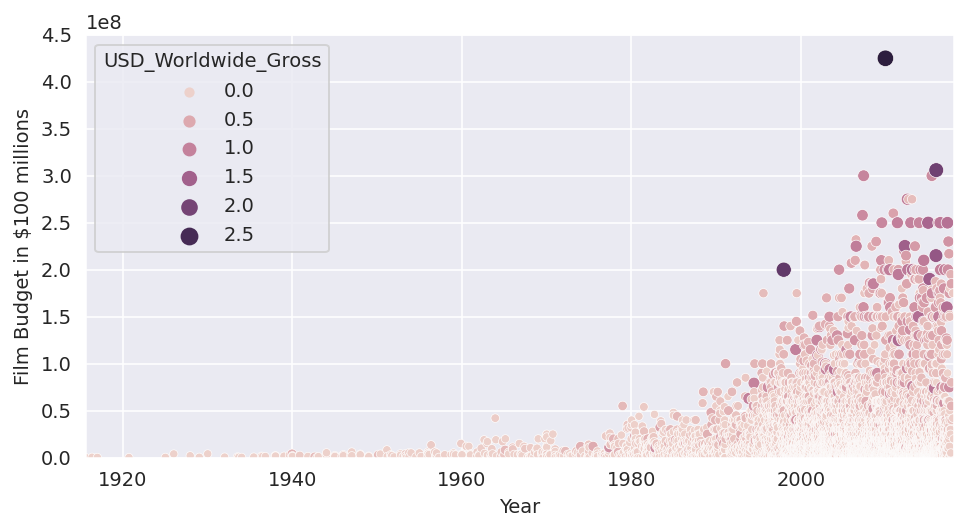

In [125]:
plt.figure(figsize=(8,4), dpi=140)

with sns.axes_style("darkgrid"):
  ax = sns.scatterplot(data=data_clean,
                      x="Release_Date",
                      y="USD_Production_Budget",
                      hue="USD_Worldwide_Gross",
                      size="USD_Worldwide_Gross")

ax.set(ylim=(0,450000000),
       xlim=(data_clean.Release_Date.min(),data_clean.Release_Date.max()),
       ylabel="Film Budget in $100 millions",
       xlabel="Year")

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [136]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year
decades = (years // 10)*10
data_clean["Decade"] = decades
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [142]:
old_films = data_clean[data_clean.Decade < 1970]
new_films = data_clean[data_clean.Decade >= 1970]
print(f"There were {len(old_films)} films released prior to 1970.")
print(f"The most expensive films made prior to 1970 was ${old_films.USD_Production_Budget.max()}.")
old_films.describe()

There were 153 films released prior to 1970.
The most expensive films made prior to 1970 was $42000000.


,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41",12.72
min,"1,253.00","100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"


In [143]:
old_films.sort_values("USD_Production_Budget", ascending=False).head(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960


# Seaborn Regression Plots

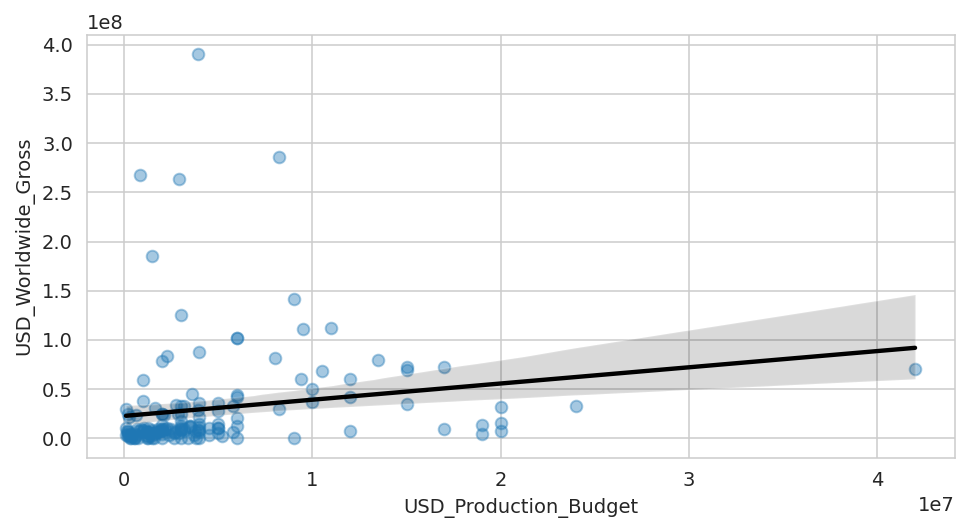

In [148]:
plt.figure(figsize=(8,4), dpi=140)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
              x="USD_Production_Budget",
              y="USD_Worldwide_Gross",
              scatter_kws={"alpha":0.4},
              line_kws={"color":"black"})


**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

[(0.0, 3000000000.0),
 Text(0, 0.5, 'Revenue in $ billions'),
 (0.0, 450000000.0),
 Text(0.5, 0, 'Budget in $ millions')]

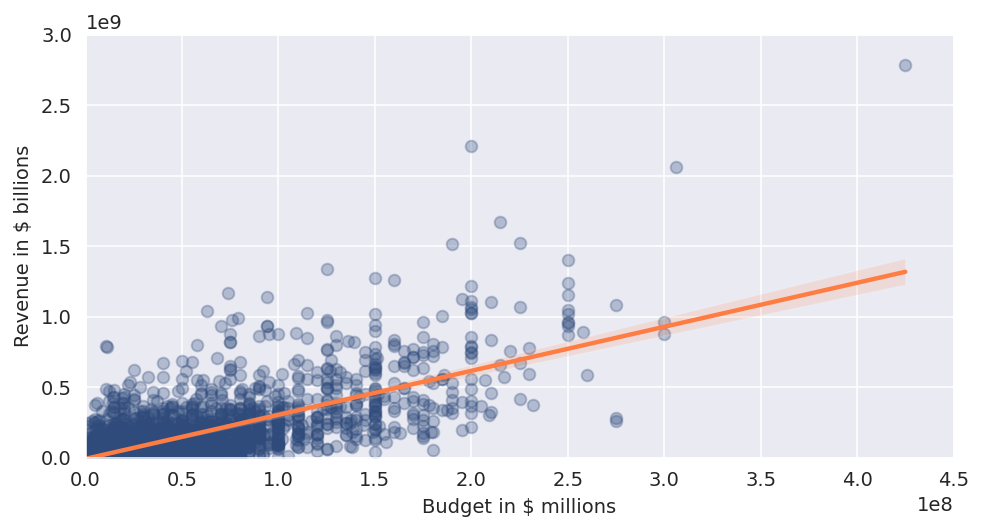

In [159]:
plt.figure(figsize=(8,4), dpi=140)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films,
              x="USD_Production_Budget",
              y="USD_Worldwide_Gross",
              color='#2f4b7c',
              scatter_kws={"alpha":0.3},
              line_kws={"color":"#ff7c43"})
ax.set(xlim=(0,450000000),
       ylim=(0,3000000000),
       xlabel="Budget in $ millions",
       ylabel="Revenue in $ billions")

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [161]:
regression = LinearRegression()

In [163]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

In [164]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [165]:
# Theta zero
regression.intercept_

array([-8650768.00661027])

In [166]:
#Theta one
regression.coef_

array([[3.12259592]])

In [167]:
# R-squared
regression.score(X, y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [169]:
X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])
regression.fit(X,y)

LinearRegression()

In [170]:
#Intercept (Theta Zero):
regression.intercept_

array([22821538.63508039])

In [171]:
#Slope (Theta One):
regression.coef_

array([[1.64771314]])

In [172]:
#r-squared:
regression.score(X,y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [178]:
budget = 350000000 
rev_est = budget * regression.coef_[0][0] +regression.intercept_[0]


In [186]:
print(f"The revenue estimate for a film with a budget of $350m is {rev_est:.10}")

The revenue estimate for a film with a budget of $350m is 599521139.0
